[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Assignments/Stat_220_HW1.ipynb)


**Problem 1**. Give an example of a variable that is (a) categorical; (b) quantitative; (c) discrete; (d) continuous.



Categorical: Favorite Color (e.g., Red, Blue, Green, Yellow). 
Quantitative: Height of a person (e.g., 170 cm, 182 cm). 
Discrete: Number of Siblings (e.g., 0, 1, 2, 3).
Continuous: Weight of a person (e.g., 65.5 kg, 72.3 kg).

**Problem 2**. Analyze the Carbon_West data file using the following code.

In [12]:
import pandas as pd
carbon_west = pd.read_csv("https://stat4ds.rwth-aachen.de/data/Carbon_West.dat")

print(carbon_west.columns)

Index(['Nation           CO2'], dtype='object')


Part a. Construct a histogram of CO2 emissions. 

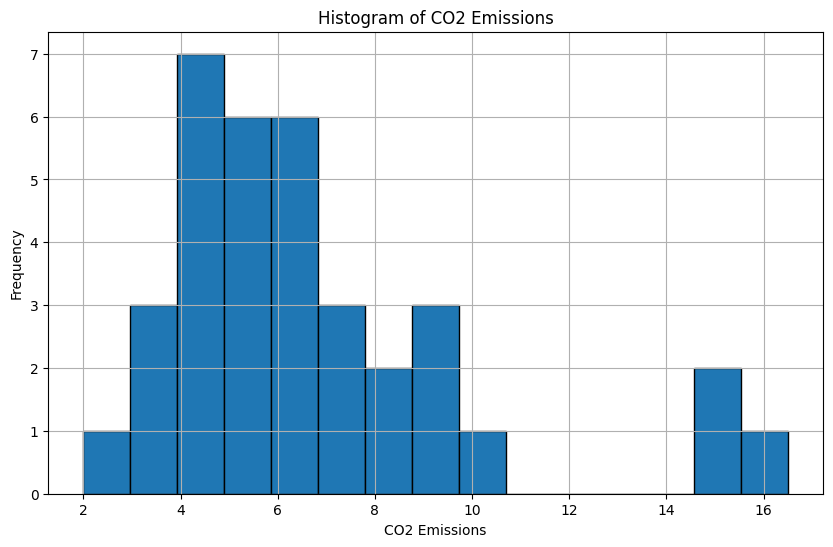

In [16]:
import matplotlib.pyplot as plt
carbon_west = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Carbon_West.dat", colspecs=[(0, 15), (16, None)])
carbon_west.columns = ['Nation', 'CO2'] 

plt.figure(figsize=(10, 6))
plt.hist(carbon_west['CO2'], bins=15, edgecolor='black')
plt.title('Histogram of CO2 Emissions')
plt.xlabel('CO2 Emissions')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Part b. Find the mean, median, and standard deviation. 

In [17]:
mean_CO2 = carbon_west['CO2'].mean()
median_CO2 = carbon_west['CO2'].median()
std_dev_CO2 = carbon_west['CO2'].std()

# Print the results
print(f"Mean CO2 Emissions: {mean_CO2}")
print(f"Median CO2 Emissions: {median_CO2}")
print(f"Standard Deviation of CO2 Emissions: {std_dev_CO2}")

Mean CO2 Emissions: 6.717142857142858
Median CO2 Emissions: 5.9
Standard Deviation of CO2 Emissions: 3.3569493954627134


**Problem 3**. Read in the murder data set using the following code. The variable murder is the murder rate (per 100,000 population) for each state in the U.S. in 2017 according to the FBI Uniform Crime Reports. At first, do not use the observation for D.C. (DC). 

In [19]:
murders = pd.read_csv("https://stat4ds.rwth-aachen.de/data/Murder.dat")
print(murders)

      state             murder   
0        AK                8.4   
1        AL                8.3   
2        AR                8.6   
3       AZ                5.9    
4        CA                4.6   
5        CO                3.9   
6        CT                2.8   
7        DE                5.6   
8        FL                5.0   
9      GA                6.7     
10      HI                2.7    
11      ID                1.9    
12       IL                7.8   
13      IN                6.0    
14    IO                3.3      
15     KS                5.5     
16      KY                5.9    
17     LA               12.4     
18     MA                2.5     
19     MD                9.0     
20     ME                1.7     
21      MI                5.7    
22     MN                2.0     
23     MO                9.8     
24     MS                8.2     
25     MT                3.9     
26      NC                5.8    
27      ND                1.3    
28      NE    

Part a. Find the mean and standard deviation for murders without D.C.

In [22]:


murders[['state', 'murder']] = murders['state             murder'].str.split(expand=True)


murders = murders.drop(columns=['state             murder'])

murders['murder'] = pd.to_numeric(murders['murder'])

murders_cleaned = murders[murders['state'] != 'DC']


mean_murder = murders_cleaned['murder'].mean()
std_dev_murder = murders_cleaned['murder'].std()

# Print the results
print(f"Mean murder rate (without D.C.): {mean_murder}")
print(f"Standard deviation of murder rates (without D.C.): {std_dev_murder}")

Index(['state             murder'], dtype='object')
Mean murder rate (without D.C.): 4.874
Standard deviation of murder rates (without D.C.): 2.586291174793806


Part b. Find the five-number  summary without D.C. 

In [24]:
five_number_summary = murders_cleaned['murder'].describe(percentiles=[0.25, 0.5, 0.75])

print("Five-number summary (without D.C.):")
print(f"Minimum: {five_number_summary['min']}")
print(f"First Quartile (25%): {five_number_summary['25%']}")
print(f"Median (50%): {five_number_summary['50%']}")
print(f"Third Quartile (75%): {five_number_summary['75%']}")
print(f"Maximum: {five_number_summary['max']}")

Five-number summary (without D.C.):
Minimum: 1.0
First Quartile (25%): 2.625
Median (50%): 4.85
Third Quartile (75%): 6.175
Maximum: 12.4


Part c. Now include the observation for D.C. and recalculate the mean, median, and five-number summary. What is affected more by this outlier: The mean or the median? The range or the inter-quartile range?

In [25]:
mean_with_dc = murders['murder'].mean()
median_with_dc = murders['murder'].median()

five_number_summary_with_dc = murders['murder'].describe(percentiles=[0.25, 0.5, 0.75])


print("Mean and Median (with D.C.):")
print(f"Mean (with D.C.): {mean_with_dc}")
print(f"Median (with D.C.): {median_with_dc}\n")

print("Five-number summary (with D.C.):")
print(f"Minimum: {five_number_summary_with_dc['min']}")
print(f"First Quartile (25%): {five_number_summary_with_dc['25%']}")
print(f"Median (50%): {five_number_summary_with_dc['50%']}")
print(f"Third Quartile (75%): {five_number_summary_with_dc['75%']}")
print(f"Maximum: {five_number_summary_with_dc['max']}")

Mean and Median (with D.C.):
Mean (with D.C.): 5.252941176470588
Median (with D.C.): 5.0

Five-number summary (with D.C.):
Minimum: 1.0
First Quartile (25%): 2.6500000000000004
Median (50%): 5.0
Third Quartile (75%): 6.45
Maximum: 24.2


**Problem 4**. Read in the Houses data file using the following code.  The variables include price (thousands of dollars), size (square feet), tax bill (dollars), number of bathrooms, number of bedrooms, and whether the house is new (1 = yes, 0 = no) for 100 home sales in Gainesville, Florida. Let
y = selling price and x = size of home.

In [26]:
houses = pd.read_csv("https://stat4ds.rwth-aachen.de/data/Houses.dat")
print(houses)

   case        price    size    new    taxes    bedrooms    baths
0      1       419.85    2048      0     3104     ...            
1      2       219.75     912      0     1173     ...            
2      3       356.55    1654      0     3076     ...            
3      4       300.00    2068      0     1608     ...            
4      5       239.85    1477      0     1454     ...            
..                                                ...            
95     96      264.00    1060      0      990     ...            
96     97      294.75    1730      0     3030     ...            
97     98      198.30    1370      0     1580     ...            
98     99      132.60    1560      0     1770     ...            
99     100     190.80    1340      0     1430     ...            

[100 rows x 1 columns]


Part a. Construct a scatterplot between square feet and price of a home. 

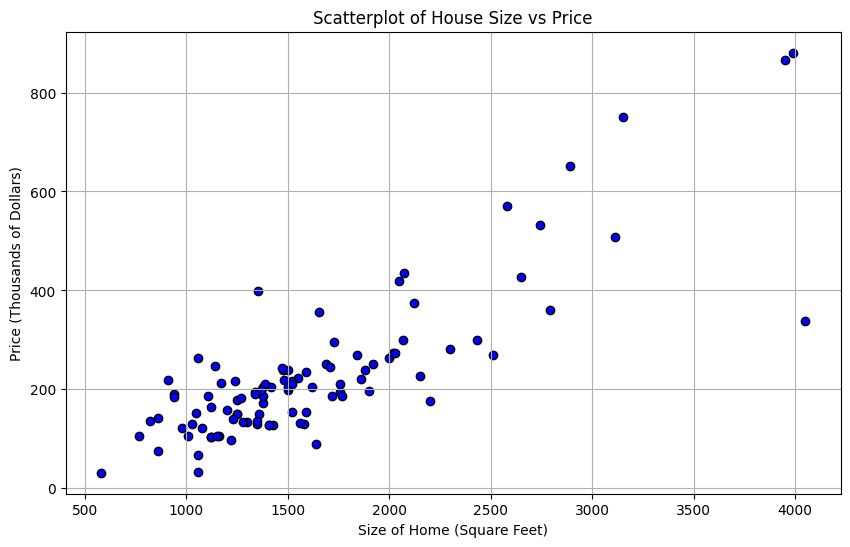

In [29]:
houses.columns = ['raw_data']

houses = houses['raw_data'].str.split(expand=True)

houses.columns = ['case', 'price', 'size', 'new', 'taxes', 'bedrooms', 'baths']

houses['price'] = pd.to_numeric(houses['price'])
houses['size'] = pd.to_numeric(houses['size'])


plt.figure(figsize=(10, 6))
plt.scatter(houses['size'], houses['price'], color='blue', edgecolor='black')


plt.title('Scatterplot of House Size vs Price')
plt.xlabel('Size of Home (Square Feet)')
plt.ylabel('Price (Thousands of Dollars)')


plt.grid(True)
plt.show()

Part b. Find the correlation between the two variables.

The correlation between house size and price is: 0.8337847885586537


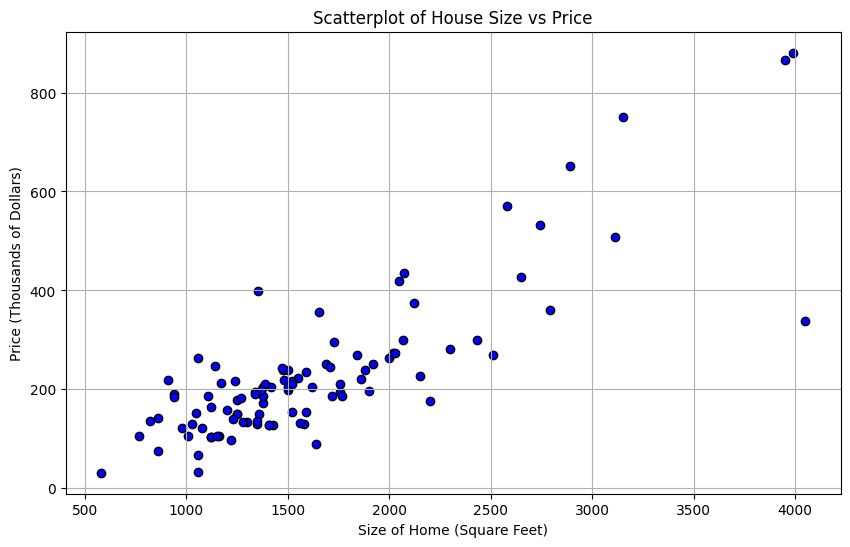

In [32]:

correlation = houses['size'].corr(houses['price'])


print(f"The correlation between house size and price is: {correlation}")

plt.figure(figsize=(10, 6))
plt.scatter(houses['size'], houses['price'], color='blue', edgecolor='black')
plt.title('Scatterplot of House Size vs Price')
plt.xlabel('Size of Home (Square Feet)')
plt.ylabel('Price (Thousands of Dollars)')


plt.grid(True)
plt.show()

Part c. Find and plot the regression line on top of the scatterplot. 

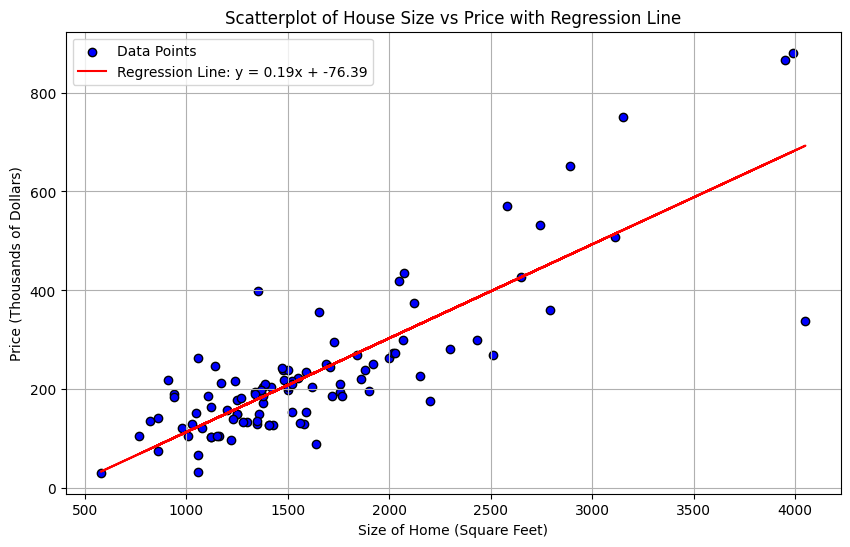

In [34]:
import numpy as np

slope, intercept = np.polyfit(houses['size'], houses['price'], 1)

# Generate the regression line (y = mx + b)
regression_line = slope * houses['size'] + intercept

# Plot the scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(houses['size'], houses['price'], color='blue', edgecolor='black', label='Data Points')

# Plot the regression line
plt.plot(houses['size'], regression_line, color='red', label=f'Regression Line: y = {slope:.2f}x + {intercept:.2f}')


plt.title('Scatterplot of House Size vs Price with Regression Line')
plt.xlabel('Size of Home (Square Feet)')
plt.ylabel('Price (Thousands of Dollars)')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

Part d. Create a side by side boxplot of price comparing homes that are new and homes that are not new. 

C:\Users\gary1\AppData\Local\Temp\ipykernel_12376\1221246268.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=['New Homes', 'Not New Homes'], patch_artist=True)


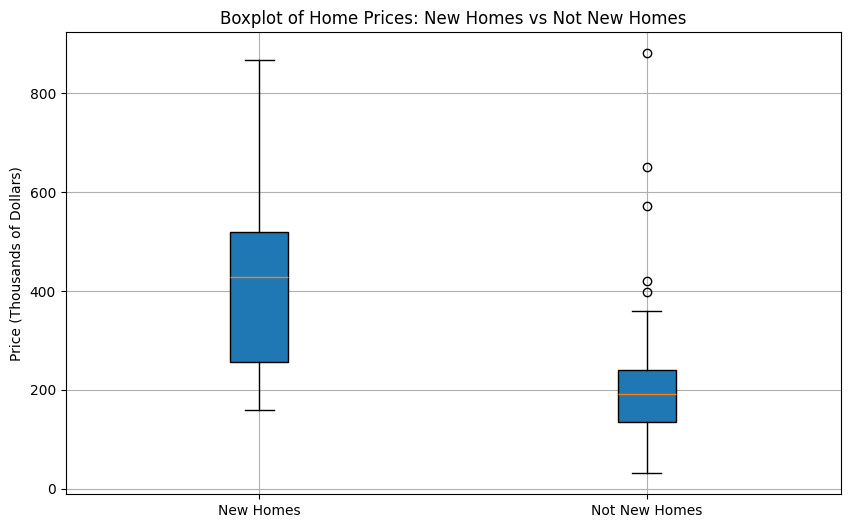

In [35]:
# Convert the necessary columns to numeric types
houses['price'] = pd.to_numeric(houses['price'])
houses['new'] = pd.to_numeric(houses['new'])


plt.figure(figsize=(10, 6))


data_to_plot = [houses[houses['new'] == 1]['price'], houses[houses['new'] == 0]['price']]


plt.boxplot(data_to_plot, labels=['New Homes', 'Not New Homes'], patch_artist=True)


plt.title('Boxplot of Home Prices: New Homes vs Not New Homes')
plt.ylabel('Price (Thousands of Dollars)')


plt.grid(True)
plt.show()

Part e. What is the relationship between size and price.  Justify your answer using the plots created. Do the same for the relationship between price and whether or not a house is new, again using the plot to justify your answer.

There is a positive relationship between home size and price: larger homes tend to cost more.
New homes generally have higher prices than not-new homes, as shown by the boxplot, where the median and range of new home prices are higher.

**Problem 1.22**. Using the Happy data file read in by the following code. Construct the contingency table relating marital status and happiness. 

In [36]:
happy = pd.read_csv("https://stat4ds.rwth-aachen.de/data/Happy.dat")
print(happy)

     subject happiness marital gender
0            1     1     1     male  
1            2     1     1     male  
2            3     1     1     male  
3            4     1     1     male  
4            5     1     1     male  
...                               ...
2137    2138     3     3     female  
2138    2139     3     3     female  
2139    2140     3     3     female  
2140    2141     3     3     female  
2141      2142     3     3     female

[2142 rows x 1 columns]


In [39]:

happy = happy['subject happiness marital gender'].str.split(expand=True)


happy.columns = ['subject', 'happiness', 'marital', 'gender']


happy['happiness'] = pd.to_numeric(happy['happiness'])
happy['marital'] = pd.to_numeric(happy['marital'])


contingency_table = pd.crosstab(happy['marital'], happy['happiness'])


print("Contingency Table: Marital Status vs Happiness")
print(contingency_table)

Contingency Table: Marital Status vs Happiness
happiness    1    2    3
marital                 
1          432  504   61
2           92  282  103
3          124  409  135
